# Homework #1

**See Canvas for HW #1 assignment due date**. Complete all of the following problems. Ideally, the theoretical problems should be answered in a Markdown cell directly underneath the question. If you don't know LaTex/Markdown, you may submit separate handwritten solutions to the theoretical problems, but please see the class scanning policy. Please do not turn in messy work. Computational problems should be completed in this notebook (using the R kernel). Computational questions may require code, plots, analysis, interpretation, etc. Working in small groups is allowed, but it is important that you make an effort to master the material and hand in your own work. 


## A. Theoretical Problems

## Problem A.1

Let $x_1,...,x_n$ be a variable measured for units in a sample. Let $\mu$ denote the mean of the *population* from which the sample came. The mean of the *sample*, as always, is $\displaystyle \bar{x} = \frac{1}{n}\sum^n_{i=1}x_i$. The sample variance is $\displaystyle s_x^2 =\frac{1}{n-1}\sum^n_{i=1}(x_i - \bar{x})^2$.


**A.1 (a) [7 points] For what value of $c$ is the quantity $\sum^n_{i=1}(x_i - c)^2$ minimized? Treat $x_i$, $i= 1,...,n$ as fixed constants. (Remember calculus?!)**

To find what value of c is the quantity minimized, we need to take the derivative and set it equal to 0. $\newline$
    Let $\displaystyle \frac{d}{dc} \sum_{i = 1}^{n} (x_i - c)^2 = 0 \rightarrow -2\sum_{i=1}^{n}(x_i - c) = 0 \rightarrow \sum_{i=1}^{n}x_i - \sum_{i=1}^{n}c = 0 \newline \displaystyle \rightarrow \sum_{i=1}^{n}x_i - cn = 0 \rightarrow c = \frac{1}{n}\sum_{i=1}^{n}x_i$

**A.1 (b) [4 points] Using the result from part (a), which of the two quantities $\sum^n_{i=1}(x_i - \bar{x})^2$ and $\sum^n_{i=1}(x_i - \mu)^2$ will be smaller than the other (assuming that $\bar{x} \ne \mu$)?**

From the results of part (a), we evetually obtain $\displaystyle \sum^{n}_{i=1}(x_i - \bar{x})^2 = \bar{x}$ and $\displaystyle \sum^n_{i=1}(x_i - \mu)^2 = \mu$. Therefore we know that $\bar{x}$ will be smaller than $\mu$ because $\mu$ is the population mean and $\bar{x}$ is the sample mean. The sample mean is a subset of the population mean. 

**A.1 (c) [8 points] Let $y_i = x_i - \bar{x}$, for $i = 1,...,n$. How does the value of $s_y^2$ compare to $s_x^2$? Prove your result. (You might start by simulating some data in R to see what happens; but then prove it in general!)**

Note that if $\bar{y} = 0$ then $S^2_{y} = S^2_{x}$, to prove that we show: 

$\displaystyle \bar{y} = \frac{1}{n}\sum_{i=1}^{n}(x_i - \bar{x})$
$\newline \Rightarrow\displaystyle \frac{1}{n}[\sum_{i=1}^{n}x_i - \sum^{n}_{i=1}\bar{x}]$
$\newline \Rightarrow\displaystyle \frac{\sum_{i=1}^{n}x_i}{n} - \frac{\bar{x}n}{n}$
$\newline \Rightarrow\displaystyle \bar{y} = \frac{1}{n}\sum_{i=1}^{n}x_i - \bar{x}$
$\Rightarrow \displaystyle \bar{x} = \frac{1}{n}\sum_{i=1}^{n}x_i - \bar{y}$

Therefore $\bar{y}=0$ for $\bar{x}$ to be the mean

**A.1 (d) [8 points] Let $\displaystyle z_i =  (x_i - \bar{x})/s_x$ for $i = 1,...,n$. What are $s_z^2$ and $s_z$? Prove your result. (You might start by simulating some data in R to see what happens; but then prove it in general!)**

Well from the definition above we know that $S^2_z$ is the sample variance. So if we were to sqaure the sample variance we will obtain the sample standard deviation - $S_z$. Now if we let $\bar{z} = 0$ we obtain $S^2_z = 1 = S_z$. As shown, 

$ \displaystyle \bar{z} = \frac{1}{n}\frac{\sum^n_{i = 1}(x_i - \bar{x})}{S_x}$
$\newline \displaystyle \Rightarrow \frac{1}{S_xn}[\sum^n_{i=1}x_i - \sum^n_{i=1}\bar{x}]$
$\newline \displaystyle \Rightarrow \frac{1}{S_xn}[\sum^n_{i=1}x_i - \bar{x}n]$
$\newline \displaystyle \Rightarrow \frac{1}{S_xn}\sum^n_{i=1}x_i - \frac{\bar{x}}{S_x}$
$\Rightarrow S_x\bar{z} = \frac{1}{n}\sum^n_{i=1}x_i - \bar{x}$
$\Rightarrow \bar{x} = \frac{1}{n}\sum^n_{i=1}x_i - S_x\bar{z}$

Therefor $\bar{z} = 0$ for $\bar{x}$ to be the mean

## B. Computational Problems

## Problem B.1: Numerical Summaries


The dataset below contains information on 522 homes for sale. The variables are:

1. `ID`: house ID nubmer
2. `Price`: the sale price of the house
3. `Sqft`: the size of the house in square feet
4. `Bedroom`: the number of bedrooms in the house
5. `Bathroom`: the number of bathrooms in the house
6. `Airconditioning`: whether the house has air conditioning or not (`0` is no, `1` is yes)
7. `Garage`: the number of garages associated with the house
8. `Pool`: whether the house has a pool (`0` is no, `1` is yes)
9. other variables that we won't use!

First, we load in the data:

In [87]:
library(RCurl) #a package that includes the function getURL(), which allows for reading data from github.
library(ggplot2) #a package for nice plots!

#getURL is a nice way of reading in data from the web
url = getURL(paste0("https://raw.githubusercontent.com/bzaharatos/",
                    "-Statistical-Modeling-for-Data-Science-Applications/",
                    "master/Modern%20Regression%20Analysis%20/Datasets/housing.txt"))
#stores the data in the dataframe amazon
house = read.csv(text = url, sep = ",")

#prints the names in the dataframe
summary(house)

       ID            Price             Sqft         Bedroom     
 Min.   :  1.0   Min.   : 84000   Min.   : 980   Min.   :0.000  
 1st Qu.:131.2   1st Qu.:180000   1st Qu.:1701   1st Qu.:3.000  
 Median :261.5   Median :229900   Median :2061   Median :3.000  
 Mean   :261.5   Mean   :277894   Mean   :2261   Mean   :3.471  
 3rd Qu.:391.8   3rd Qu.:335000   3rd Qu.:2636   3rd Qu.:4.000  
 Max.   :522.0   Max.   :920000   Max.   :5032   Max.   :7.000  
    Bathroom     Airconditioning      Garage         Pool        
 Min.   :0.000   Min.   :0.0000   Min.   :0.0   Min.   :0.00000  
 1st Qu.:2.000   1st Qu.:1.0000   1st Qu.:2.0   1st Qu.:0.00000  
 Median :3.000   Median :1.0000   Median :2.0   Median :0.00000  
 Mean   :2.642   Mean   :0.8314   Mean   :2.1   Mean   :0.06897  
 3rd Qu.:3.000   3rd Qu.:1.0000   3rd Qu.:2.0   3rd Qu.:0.00000  
 Max.   :7.000   Max.   :1.0000   Max.   :7.0   Max.   :1.00000  
   YearBuild       Quality           Lot          AdjHighway     
 Min.   :1885   M

**B.1 (a) [5 points] Change the bedroom, bathroom, air conditiong, garage, and pool variables to factors. Remove the `YearBuild`, `Quality`, `Lot`, and `AdjHighway` variables. Store this new data frame in `house2`. Then print a summary of `house2`.**

We will use `house2` for the rest of B.1.

In [88]:
#YOUR CODE HERE
house$Bedroom = factor(house$Bedroom)
house$Bathroom = factor(house$Bathroom)
house$Airconditioning <- factor(house$Airconditioning)
house$Garage <- factor(house$Garage)
house$Pool <- factor(house$Pool)
keeps <- c(1:8)
house2 = house[keeps]

**B.1 (b) [4 points] Write code that extracts all of the rows/houses with a pool. Store your answer as a data frame in `House_Pool`.**

In [89]:
House_Pool <- subset(house2, house2$Pool == 1)

**B.1 (c) [4 points] Write code that extracts all of the rows/houses with square footage less than the median. Store your answer as a data frame in `House_Small`.**


In [90]:
sqft_median <-median(house2$Sqft)
House_Small <- subset(house2, house2$Sqft < sqft_median)

**B.1 (d) [4 points] What is the mean house price (across all variables, in `house2`)? Store your answer in `average_price`**

In [91]:
average_price <- mean(house2$Price)

**B.1 (e) [4 points] What is the average house price for houses with a pool (again, using `house2`)? Store your answer in `average_price_pool`.**

In [183]:
#YOUR CODE HERE
average_price_pool <- mean(House_Pool$Price)
average_price_pool 
# average_price_pool <- tapply(house2$Price, house2$Pool == 1, mean)
# average_price_pool <-average_price_pool[2]
# average_price_pool

[1] 352120.3

**B.1 (f) [5 points] Compare the average house price for houses with a pool to the average house price for houses without a pool. Which is larger?** 

Based on the data alone, can you draw any *causal* conclusions about the effect of a pool on the price of a home? Why or why not?

In [61]:
#YOUR CODE HERE
aggregate(Price ~ Pool, data = house2, mean)

Pool,Price
0,272395.9
1,352120.3


The price of a house with a pool is more expensive than a house without a pool because a pool is an added amenity 
that usually makes the house more luxurious and desired. Additionally, it cost more to build a house with a pool than
a house with out a pool. 

## Problem B.2 [5 points]

Verify the results of Problem A.1, parts (c) and (d), by simulating $x_1,...,x_{50}$ from `rnorm(50,5,1)` and performing the relevant computations. 

In [164]:
x = rnorm(50,5,1)
x_mean <- mean(x)
x_sd <- sd(x)
x_size = length(x)



#1c) Note that if y_bar == x_bar, then we get the x variance
s_y = function(x_bar, y_bar, x, n){ # x_bar = mean, y_bar = mean, x = list, n = size of list
    y = 0; 
    for(i in x){
        y = y + (i - x_bar - y_bar)**2
    }
    y = y/(n-1)
    return(y)
}


#1d) 
s_z = function (x_bar,z_bar, x_sd, x, n){ # x_bar = mean, z_bar = z mean, x_sd = samples std dev, x = list, n = size of list
    z = 0; 
    for (i in x){
        z = z + (((i - x_bar)/x_sd) - z_bar)**2
    }
    z = z/(n-1)
    z = sqrt(z)
    return(z)
}

s_z_sqrd = function (x_bar,z_bar, x_sd, x, n){ # x_bar = mean, z_bar = z mean, x_sd = samples std dev, x = list, n = size of list
    z = 0; 
    for (i in x){
        z = z + (((i - x_bar)/x_sd) - z_bar)**2
    }
    z = z/(n-1)
    return(z)
}

cat("x sample variance: ", var(x))
#1c
cat(" S_y: ",s_y(x_mean,0,x, x_size))
#1d
cat(" S_z: ", s_z(x_mean, 0, x_sd, x, x_size))
cat(" (S_z)^2: ", s_z_sqrd(x_mean, 0, x_sd, x, x_size))



x sample variance:  1.206754 S_y:  1.206754 S_z:  1 (S_z)^2:  1

## Problem B.3: Graphical Summaries


The dataset for this question contains information on 522 homes for sale (the same dataset as in B.1). The variables are:

1. `ID`: house ID nubmer
2. `Price`: the sale price of the house
3. `Sqft`: the size of the house in square feet
4. `Bedroom`: the number of bedrooms in the house
5. `Bathroom`: the number of bathrooms in the house
6. `Airconditioning`: whether the house has air conditioning or not (`0` is no, `1` is yes)
7. `Garage`: the number of garages associated with the house
8. `Pool`: whether the house has a pool (`0` is no, `1` is yes)
9. other variables that we won't use!

Use the `house2` version of this dataset that you created in B.1.

**B.3 (a) [7 points] Create a scatterplot (preferably using `ggplot`, though you can earn full credit with a basic plot) of `Price` (vertical axis) against `Sqft` (horizontal axis). Use the plot to describe the relationship between these two variables.**

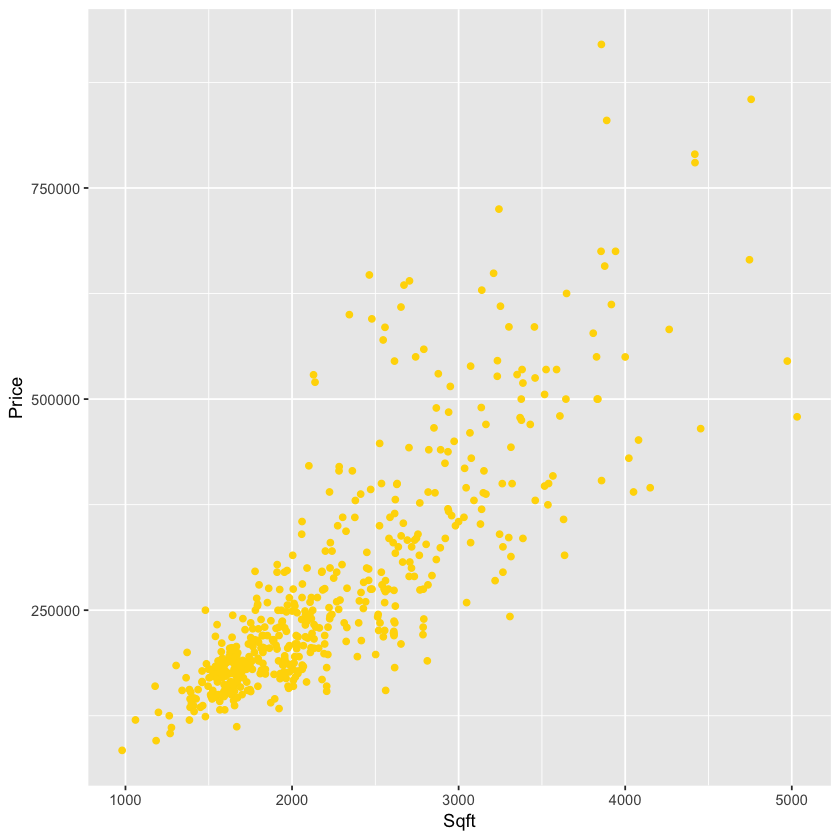

In [158]:
#YOUR CODE HERE
ggplot(house2, aes(x = Sqft, y = Price)) + geom_point(color = 'gold')

The relationship of the two variables is, as the Sqft of the house gets larger the price of the house increases. The relationship also tells us that their are more houses around 1700 priced below 250,000. 

**B.3 (b) [12 points] Create histograms and characterize the distributions of the variables `Price` and `Sqft`. Are the distributions (i) symmetric/skewed, or (ii) unimodal/multimodal? (iii) Does it have any outliers?**

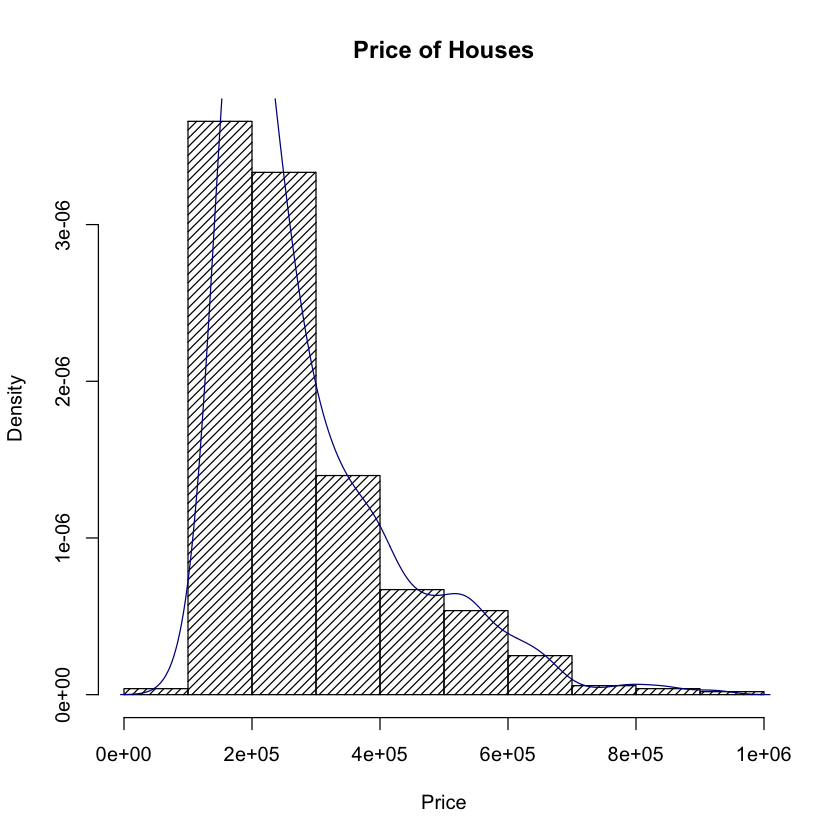

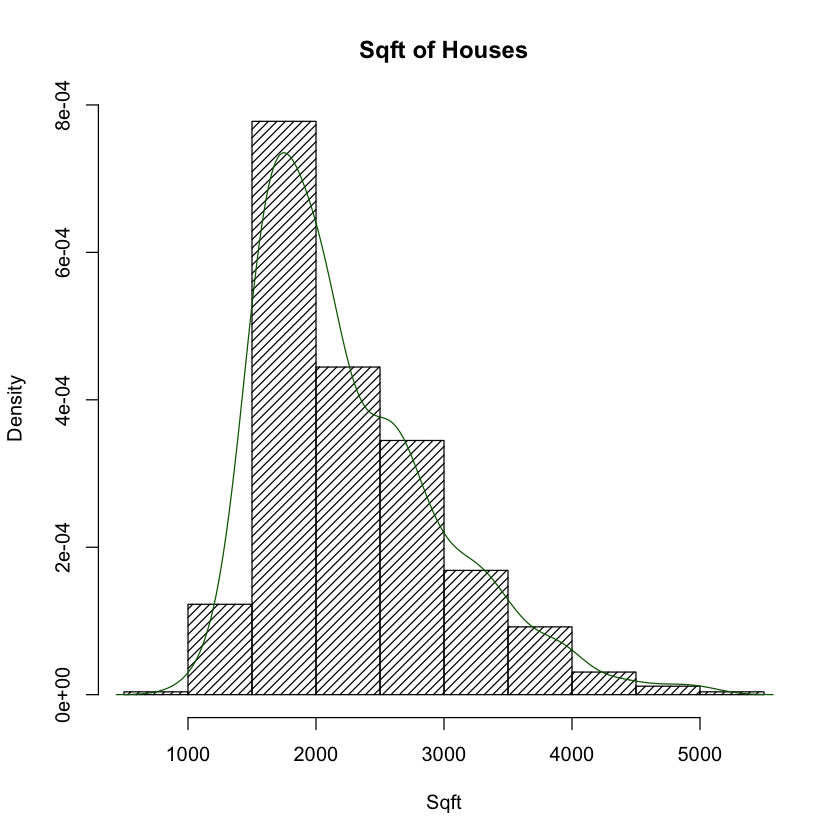

In [150]:
#YOUR CODE HERE
x <- house2$Price
hist(x, density = 20, freq = FALSE, xlab = 'Price', main = 'Price of Houses') 
lines(density(x), col="dark blue")

y <- house2$Sqft
hist(y, density = 20, freq = FALSE, xlab = 'Sqft', main = "Sqft of Houses")
lines(density(y), col="dark green")

From our histograms the distributions are skewed to the left, having a positive skew. The histograms of Price and Sqft are unimodel, and the outliers, I think, are $100,000 and $1,000,000 and 1,000 sqft and 5,000 sqft.

**B.3(c) [10 points] Create a boxplot of `Price` conditioned on `Bedroom`. Are there any outliers? Does there appear to be a large difference in total price between homes with two bedrooms and homes with three bedrooms?**

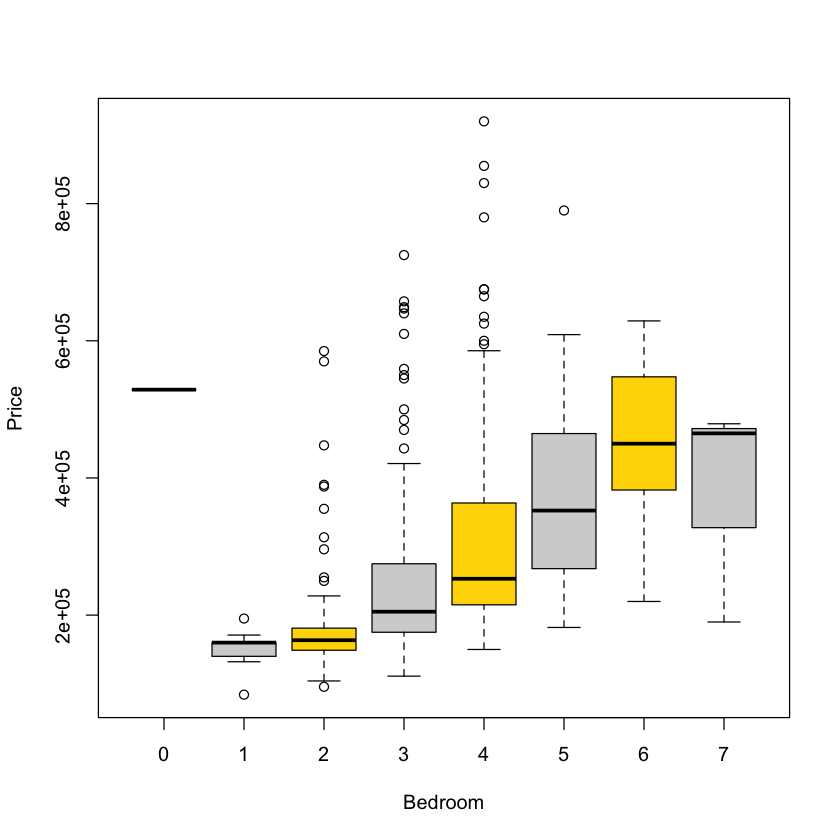

In [157]:
#YOUR CODE HERE
boxplot(house2$Price ~ house2$Bedroom, xlab = 'Bedroom', ylab ='Price', col = c('gold', 'light grey'))

   Yes, the largest outliers we have is a 4 bedroom house priced at $800,000$. There are more outliers through the box plot, however, the most significant ones are in 4 bedrooms houses priced above $400,000$ (Expensive!). 
   There does not appear a large difference from 2 bedroom houses to 3 bedroom houses looking at there median. If we compare them from most expensive price - disregarding outliers - in the box, than one can say, yes, there is a large difference between the most expensive 2 bedroom houses to the most expensive 3 bedroom houses. 

## Problem B.4 [13 points]

Let's create a variable, `v`, that has a bimodal distribution. To do this, we'll make use of the following functions:

- `replicate()`. We used this function in the Introduction to Jupyter and R Notebook from the first week. It's a short way to write loops!
- `ifelse()`. This function will provide different tasks based on an output. For example, `ifelse(a < 5, 1, 0)` will output `1` if `a < 5` and `0` otherwise.
- `runif(n, 0, 1)`. This function generates `n` random numbers between `0` and `1`.
- `rnorm(n,a,b)`. We used this function in the Introduction to Jupyter and R Notebook from the first week. It generates `n` random numbers according to a bell curve, centered over `a`, with "spread" `b`

Ok, here's how we'll create `v`: 

1. Generate a single random number between `0` and `1`. 
2. If the number from the previous step is greater than `0.5`, generate a random number from the bell curve centered at `0` with spread `1`. On the other hand, if the number from the previous step is less than `0.5`, generate a random number from the bell curve centered at `5` with spread `1`.
2. Repeat this process `n = 1000` times.

Then, create a histogram of `v`, and set `breaks = 25`. What do you notice about the distribution?

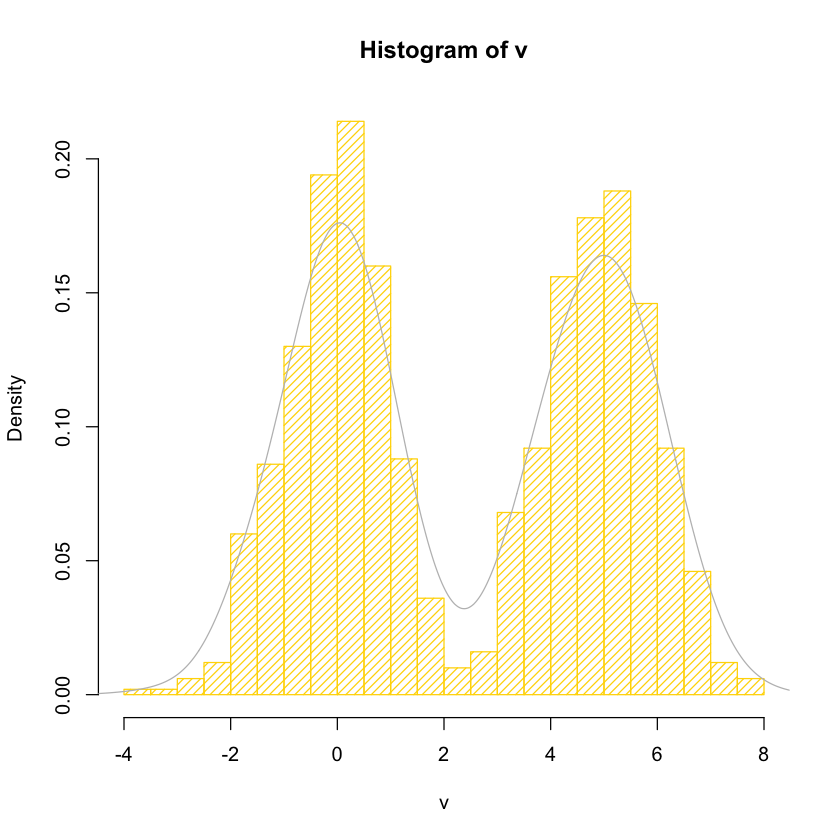

In [171]:
#YOUR CODE HERE
n <- 1000
v <- replicate(n, ifelse(runif(1)>0.5,rnorm(1,0,1), rnorm(1,5,1)))
hist(v, breaks = 25, density = 20, col="gold", freq=FALSE)
lines(density(v), col = 'grey')
          


We have two peaks - bimodal distribution. From this random generated data, the values distribute in 2 different kinds of values, 0 and 5.